# HOUGH TRANSFORM

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

path=r'D:/Study/Python/openCV/College/res/'

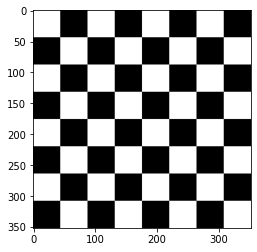

In [2]:
img_col=cv2.imread(path+"flat_chessboard.png")
# img_col=cv2.resize(img_col,(500,300))
img=cv2.cvtColor(img_col,cv2.COLOR_BGR2GRAY)
img_col=cv2.cvtColor(img_col,cv2.COLOR_BGR2RGB)
plt.imshow(img,"gray")

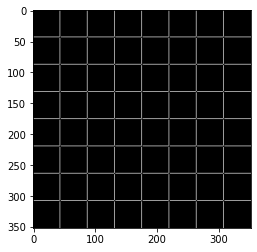

In [3]:
edge_img=cv2.Canny(img,20,20)
plt.imshow(edge_img,'gray')

In [4]:
diag=np.sqrt(edge_img.shape[0]**2+edge_img.shape[1]**2)


In [5]:
acc_h=round(np.sqrt(edge_img.shape[0]**2+edge_img.shape[1]**2))
dtheta=np.pi/acc_h
acc=np.zeros((acc_h,acc_h))
for i in range(edge_img.shape[0]):
    for j in range(edge_img.shape[1]):
        if edge_img[i,j]==255:
            for theta in range(acc_h):
                rho=round(j*np.sin(dtheta*theta)+i*np.cos(dtheta*theta))
                acc[rho,theta]+=1

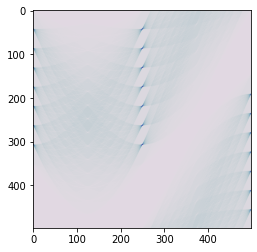

In [7]:
plt.imshow(acc,'twilight')


In [12]:
thresh=50
img1=img_col+0
for rho in range(acc.shape[0]):
    for theta in range(acc.shape[1]):
        if acc[rho][theta]>thresh:
            a=np.cos(theta*dtheta)
            b=np.sin(theta*dtheta)
            x0,y0=a*rho,b*rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            img1=cv2.line(img1,(x1,y1),(x2,y2),(0,0,255),1)

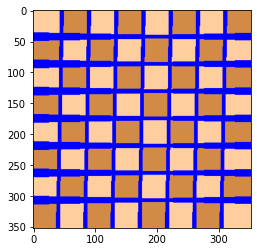

In [13]:
plt.imshow(img1)